<a href="https://colab.research.google.com/github/Ophineon/Data/blob/main/MLDiabeteicDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
!pip install pydot
!pip install pydot-ng
!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3
import seaborn as sns
#for graphing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#model training import
from sklearn.preprocessing import StandardScaler
#scaling import
from sklearn.neighbors import KNeighborsClassifier
#classifiers import
from sklearn.metrics import classification_report, confusion_matrix
#evaluation imports
from sklearn.tree import DecisionTreeClassifier
#decision tree classifier import
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
#for more graphing
import pydot 
from sklearn.ensemble import RandomForestClassifier
#for the random forest algorithim
from sklearn import tree
import graphviz as g
from sklearn.linear_model import LogisticRegression

     |████████████████████████████████| 5.4 MB 14.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


#Loading the Data

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/Ophineon/Data/main/diabetic_data.csv')

#Viewing and Cleaning

In [4]:
df.shape

(101766, 50)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#Performing EDA

In [14]:
todrop = [
'encounter_id',
'patient_nbr',          
'admission_type_id',
'discharge_disposition_id',
'time_in_hospital',
'payer_code',
'medical_specialty',
'num_lab_procedures',
'num_procedures',
'num_medications',
'number_outpatient',
'number_emergency',
'number_inpatient',
'diag_1',
'diag_2',
'diag_3',
'max_glu_serum',
'A1Cresult',
'metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'citoglipton',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone',
'change',
'diabetesMed',
'admission_type_id',
'examide'
]

In [15]:
df2 = df.drop(columns=todrop, inplace=False)

In [16]:
df2.head()

,race,gender,age,weight,admission_source_id,number_diagnoses,readmitted
0,Caucasian,Female,[0-10),?,1,1,NO
1,Caucasian,Female,[10-20),?,7,9,>30
2,AfricanAmerican,Female,[20-30),?,7,6,NO
3,Caucasian,Male,[30-40),?,7,7,NO
4,Caucasian,Male,[40-50),?,7,5,NO


#Vizulaizing the Data

In [17]:
sns.set_theme(style="darkgrid")
#changes background of graph
sns.set_context("paper")
#changes texture of graph background
sns.set(rc = {'figure.figsize':(16,9)})
#changing figure size to better display

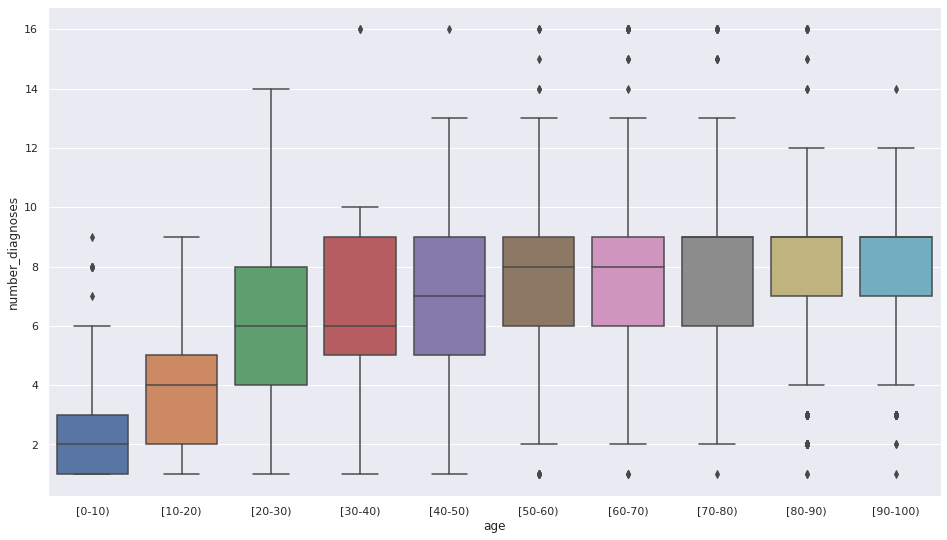

In [20]:
sns.boxplot(x=df2['age'], y=df2['number_diagnoses'])

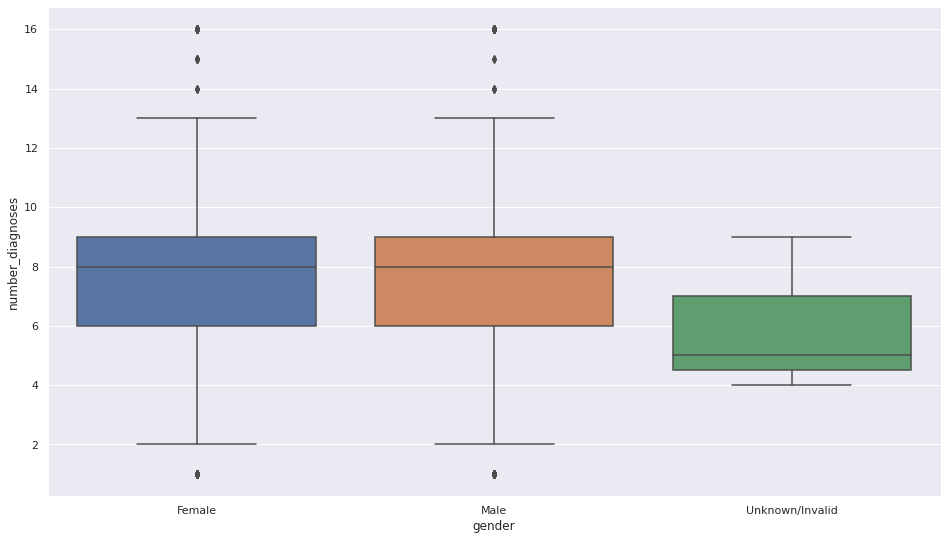

In [26]:
sns.boxplot(x=df2['gender'], y=df2['number_diagnoses'])

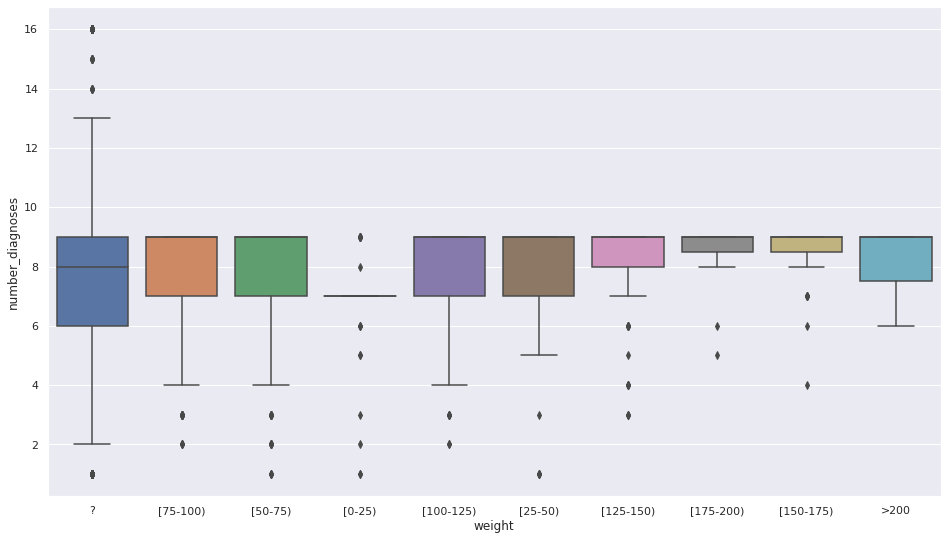

In [27]:
sns.boxplot(x=df2['weight'], y=df2['number_diagnoses'])

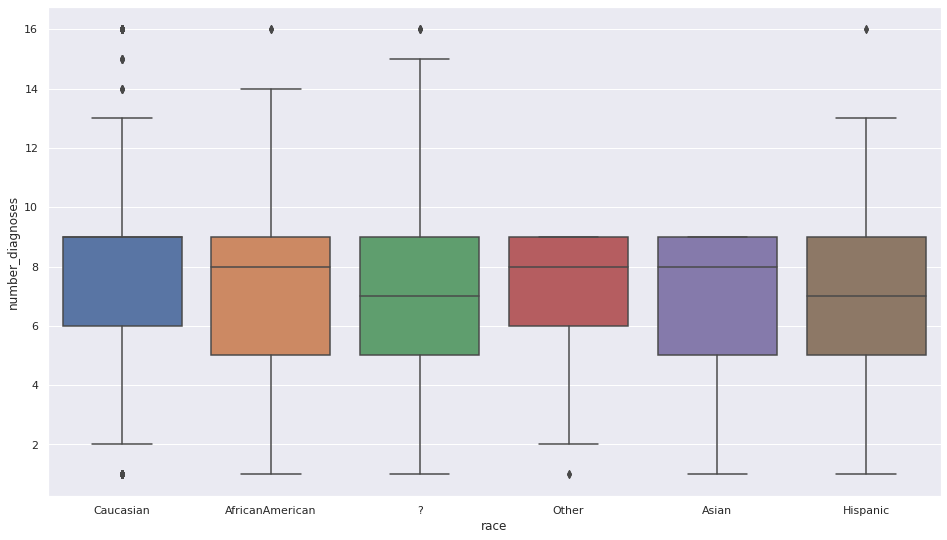

In [33]:
sns.boxplot(x=df2['race'], y=df2['number_diagnoses'])

In [65]:
df3 = df2.copy(deep= True)

In [66]:
df3.drop(columns= 'race', inplace=True)

In [67]:
df3.drop(columns= 'gender', inplace=True)

In [68]:
df3.head()

,age,weight,admission_source_id,number_diagnoses,readmitted
0,[0-10),?,1,1,NO
1,[10-20),?,7,9,>30
2,[20-30),?,7,6,NO
3,[30-40),?,7,7,NO
4,[40-50),?,7,5,NO


#Machine Learning Models

##KNN Algorithim

##Decision Tree Model

#Conclusions Drawn

In [ ]:
#there is no significant correlation between gender and the amount of times a person is diagnosed with diabetes

In [ ]:
#there is usually a higher number of people in there 20 - 30 with diabetes than any other age group

In [ ]:
#out of the races given, african americans had the largest median of people with diabetes

In [ ]:
#weight had no significant correlation with the amount of times a person was diagnosed

In [ ]:
#From the data, I conclude that african americans between the ages of 20 and 30 have the highest risk of diabetes